# Description


Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, we've launched many Playground competitions that are more approachable than our Featured competitions and thus, more beginner-friendly.

In order to have a more consistent offering of these competitions for our community, we're trying a new experiment in 2021. We'll be launching month-long tabular Playground competitions on the 1st of every month and continue the experiment as long as there's sufficient interest and participation.

The goal of these competitions is to provide a fun, and approachable for anyone, tabular dataset. These competitions will be great for people looking for something in between the Titanic Getting Started competition and a Featured competition. If you're an established competitions master or grandmaster, these probably won't be much of a challenge for you. We encourage you to avoid saturating the leaderboard.

For each monthly competition, we'll be offering Kaggle Merchandise for the top three teams. And finally, because we want these competitions to be more about learning, we're limiting team sizes to 3 individuals.

The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting identifying spam emails via various extracted features from the email. Although the features are anonymized, they have properties relating to real-world features.

Good luck and have fun!

For ideas on how to improve your score, check out the Intro to Machine Learning and Intermediate Machine Learning courses on Kaggle Learn.

# Import

In [1]:
import os
import pandas as pd
import numpy as np

# Load Data

In [2]:
os.chdir("../")
if not os.path.isdir("./model"):
    os.mkdir("./model")

# Data analysis

## Check row data

In [3]:
sample_submission = pd.read_csv("./data/sample_submission.csv")
sample_submission

,id,target
0,600000,0.5
1,600001,0.5
2,600002,0.5
3,600003,0.5
4,600004,0.5
...,...,...
539995,1139995,0.5
539996,1139996,0.5
539997,1139997,0.5
539998,1139998,0.5


In [4]:
# no id duplicated
(sample_submission["id"].value_counts() > 1).sum()

0

In [5]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [6]:
# binary classification
train["target"].value_counts()

1    303606
0    296394
Name: target, dtype: int64

In [7]:
# no null data
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [8]:
train

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,...,1.098620,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,...,3.460170,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,...,4.883000,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.141120,0.124464,0.148209,0
3,3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,...,3.474390,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,...,1.910590,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,0.072798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.043008,1.640550,1375.8900,1.087030,0.839580,1.69362,3.843520,1.108250,1.505390,...,1.552280,0.080317,0.017643,0.225133,0.073179,4.436510,1.739330,0.049038,0.065804,1
599996,599996,0.137048,4.826860,-99.6478,0.985289,0.037712,3.30370,2.471790,5.942130,0.875148,...,1.345210,0.092457,0.081926,0.234041,0.041383,3.873990,1.870100,0.162313,0.085662,0
599997,599997,1.316220,0.502062,66.2360,2.233020,0.060038,3.77371,2.655340,3.155890,1.055020,...,2.181150,0.032708,0.109668,0.027466,0.061931,-0.383329,0.922113,0.084864,0.052635,0
599998,599998,0.511918,3.827470,777.8720,0.285914,0.520157,2.76285,2.522200,1.561360,1.971140,...,0.366702,0.070943,0.071452,-0.038071,0.038829,-0.122888,3.107790,0.061333,0.004179,1


In [9]:
# check corr coef with val and ans
# --> in binary classification its not effective?
def coef(arr1, arr2):
    return np.corrcoef(arr1, arr2)[0][1]

## Get features

In [10]:
import matplotlib.pyplot as plt

train_target = train["target"]
train_feature = train.drop(["id", "target"], axis=1)

test_feature = test.drop(["id"], axis=1)

In [11]:
# f2's val is so big 
train.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,0.306508,2.497590,306.644536,2.647901,0.177850,2.556832,2.699650,2.571593,2.538273,...,2.444471,0.155260,0.059407,0.144932,0.106419,2.547853,2.590159,0.158881,0.123048,0.506010
std,173205.225094,0.522450,1.554018,551.743893,1.544529,0.417488,1.562527,1.564000,1.549361,1.532988,...,1.542509,0.548397,0.119426,0.462015,0.209128,1.558427,1.525091,0.436190,0.264896,0.499964
min,0.000000,-3.797450,-1.223960,-1842.530000,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,...,-1.217700,-9.761770,-4.666240,-3.101500,-1.276540,-1.584740,-1.254730,-3.993500,-2.783380,0.000000
25%,149999.750000,0.026222,1.186238,43.573400,1.442028,0.019709,1.261038,1.385820,1.333848,1.292163,...,1.214178,0.018904,0.024483,0.017055,0.025461,1.247888,1.348078,0.013536,0.018105,0.000000
50%,299999.500000,0.097788,2.516500,133.626000,2.634130,0.061586,2.590425,2.801255,2.557985,2.475880,...,2.386845,0.068906,0.056649,0.063439,0.062151,2.601940,2.682090,0.058058,0.058471,1.000000
75%,449999.250000,0.397184,3.787630,302.262250,3.907640,0.112712,3.813662,3.996913,3.823450,3.804360,...,3.693872,0.125165,0.088162,0.113114,0.102016,3.820665,3.839520,0.110718,0.104872,1.000000
max,599999.000000,8.781500,6.226720,6119.280000,6.521150,8.265470,6.515070,6.586780,6.258770,6.389670,...,6.573890,18.412800,10.211800,8.623270,3.657220,6.254360,6.145300,10.767000,5.988110,1.000000


## Box Plotting
1. some feature's scale is so bigger than others

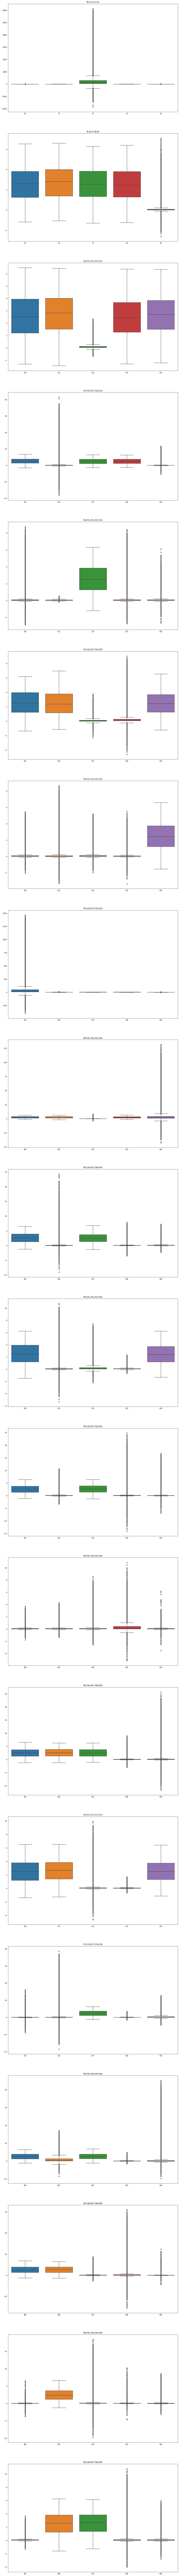

In [12]:
import seaborn as sns
plt_split_num = 20

fig, ax = plt.subplots(plt_split_num, 1, figsize=(18, 14 * plt_split_num))
axs = []
for index, col_name in enumerate(np.array_split(train_feature.columns, plt_split_num)):
    sns.boxplot(data=train_feature[col_name], ax=ax[index])
    ax[index].set_title(",".join(col_name))

# Preprocessing

## remove abnormal data
--> not good

In [13]:
def outlier_iqr(data, replace_mean=True):
    p25, p75 = np.percentile(data, [25, 75])
    IQR_max = p75 + (p75 - p25) * 1.5
    IQR_min = p75 - (p75 - p25) * 1.5
    if replace_mean:
        return np.where((data > IQR_min) & (data < IQR_max), data, data.mean())
    else:
        return np.where((data > IQR_min) & (data < IQR_max), data)
# for col in train_feature.columns:
#     train_feature[col] = outlier_iqr(train_feature[col])
# train_feature

## Standardzation
1. its most effective

In [14]:
from sklearn.preprocessing import StandardScaler

def add_standardzation(train_feature, test_feature, valid_feature, inplace=False):
    # only apply original data : because of memory usage
    train_feature_original = train_feature.iloc[:, :100]
    test_feature_original = test_feature.iloc[:, :100]
    valid_feature_original = valid_feature.iloc[:, :100]

    # fit
    scaler = StandardScaler().fit(train_feature_original)
    train_feature_standard = scaler.transform(train_feature_original)
    test_feature_standard = scaler.transform(test_feature_original)
    valid_feature_standard = scaler.transform(valid_feature_original)

    # make features
    columns = [f"{col}_standard" for col in train_feature_original.columns]
    train_feature_standard = pd.DataFrame(train_feature_standard, columns=columns)
    test_feature_standard = pd.DataFrame(test_feature_standard, columns=columns)
    valid_feature_standard = pd.DataFrame(valid_feature_standard, columns=columns)

    # inplace or add features
    if inplace:
        return train_feature_standard, test_feature_standard, valid_feature_standard
    train_feature = pd.concat([train_feature, train_feature_standard], axis=1)
    test_feature = pd.concat([test_feature, test_feature_standard], axis=1)
    valid_feature = pd.concat([valid_feature, valid_feature_standard], axis=1)
    return train_feature, test_feature, valid_feature
# train_feature, test_feature, _ = add_standardzation(train_feature, test_feature, _)

## Gaussian Kernel
1. check: is it similar with power transform?

In [15]:
from sklearn.preprocessing import PowerTransformer

def add_kernel(train_feature, test_feature, validation_feature, inplace=False):
    train_feature_original = train_feature.iloc[:, :100]
    test_feature_original = test_feature.iloc[:, :100]
    validation_feature_original = validation_feature.iloc[:, :100]

    kernel = PowerTransformer().fit(train_feature_original)

    train_feature_gk = kernel.transform(train_feature_original)
    test_feature_gk = kernel.transform(test_feature_original)
    validation_feature_gk = kernel.transform(validation_feature_original)

    columns = [f"{col}_gk" for col in train_feature_original.columns]
    train_feature_gk = pd.DataFrame(train_feature_gk, columns=columns)
    test_feature_gk = pd.DataFrame(test_feature_gk, columns=columns)
    validation_feature_gk = pd.DataFrame(validation_feature_gk, columns=columns)
    if inplace:
        return train_feature_gk, test_feature_gk, validation_feature_gk
    train_feature = pd.concat([train_feature, train_feature_gk], axis=1)
    test_feature = pd.concat([test_feature, test_feature_gk], axis=1)
    validation_feature = pd.concat([validation_feature, validation_feature_gk], axis=1)
    return train_feature, test_feature, validation_feature
# train_feature, test_feature = add_kernel(train_feature, test_feature)

## Normalization
1. its maybe effective if features matrix rank is low

In [16]:
from sklearn.preprocessing import Normalizer

def add_norm(train_feature, test_feature, validation_feature, inplace=False):
    train_feature_original = train_feature.iloc[:, :100]
    test_feature_original = test_feature.iloc[:, :100]
    validation_feature_original = validation_feature.iloc[:, :100]

    normalizer = Normalizer(norm='l2').fit(train_feature_original)

    train_feature_norm = normalizer.transform(train_feature_original)
    test_feature_norm = normalizer.transform(test_feature_original)
    validation_feature_norm = normalizer.transform(validation_feature_original)

    columns = [f"{col}_norm" for col in train_feature_original.columns]
    train_feature_norm = pd.DataFrame(train_feature_norm, columns=columns)
    test_feature_norm = pd.DataFrame(test_feature_norm, columns=columns)
    validation_feature_norm = pd.DataFrame(validation_feature_norm, columns=columns)
    if inplace:
        return train_feature_norm, test_feature_norm, validation_feature_norm
    train_feature = pd.concat([train_feature, train_feature_norm], axis=1)
    test_feature = pd.concat([test_feature, test_feature_norm], axis=1)
    validation_feature = pd.concat([validation_feature, validation_feature_norm], axis=1)
    return train_feature, test_feature, validation_feature
# train_feature, test_feature = add_norm(train_feature, test_feature)

## Ploynomial features
need more memory, not use

In [17]:
from sklearn.preprocessing import PolynomialFeatures
def add_poly(train_feature, test_feature, validation_feature, inplace=False):
    train_feature_original = train_feature.iloc[:, :100]
    test_feature_original = test_feature.iloc[:, :100]
    validation_feature_original = validation_feature.iloc[:, :100]

    poly = PolynomialFeatures(2).fit(train_feature_original)

    train_feature_poly = poly.transform(train_feature_original)
    test_feature_poly = poly.transform(test_feature_original)
    validation_feature_poly = poly.transform(validation_feature_original)

    columns = [f"{col}_poly" for col in train_feature_original.columns]
    train_feature_poly = pd.DataFrame(train_feature_poly, columns=columns)
    test_feature_poly = pd.DataFrame(test_feature_poly, columns=columns)
    validation_feature_poly = pd.DataFrame(validation_feature_poly, columns=columns)

    if inplace:
        return train_feature_poly, test_feature_poly, validation_feature_poly
    train_feature = pd.concat([train_feature, train_feature_poly], axis=1)
    test_feature = pd.concat([test_feature, test_feature_poly], axis=1)
    validation_feature = pd.concat([validation_feature, validation_feature_poly], axis=1)
    return train_feature, test_feature, validation_feature
# train_feature, test_feature = add_poly(train_feature, test_feature)

In [18]:
# preprocessing
def preprocess(
    train_feature,
    test_feature,
    validation_feature,
    options,
    inplace=True,
):
    standardzation=options[0]
    gaussian_kernel=options[1]
    normalize=options[2]
    # polynomial=options[3]

    if standardzation:
        print("standardzation")
        train_feature, test_feature, validation_feature = add_standardzation(train_feature, test_feature, validation_feature, inplace)
    if gaussian_kernel:
        print("gaussian kernel")
        train_feature, test_feature, validation_feature = add_kernel(train_feature, test_feature, validation_feature, inplace)
    if normalize:
        print("normalize")
        train_feature, test_feature, validation_feature = add_norm(train_feature, test_feature, validation_feature, inplace)
    # if polynomial:
    #     train_feature, test_feature = add_poly(train_feature, test_feature, validation_feature, inplace)
    return train_feature, test_feature, validation_feature


## Extract all case binary combination

In [19]:
from itertools import combinations
import numpy as np

def get_binary_combination_matrix(num_func):
    all_case = []
    identitiy = np.identity(num_func)
    for function_index in range(1, num_func + 1):
        for comb in combinations(identitiy, function_index):
            for index, target_list in enumerate(comb):
                if index == 0:
                    arr = np.array(target_list)
                else:
                    arr += np.array(target_list)
            all_case.append(arr)
    return all_case

# Define FNN

In [20]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def modeling_evaluation(
    train_feature,
    train_target, 
    test_feature, 
    test_target, 
    validation_feature,
    options,
    inplace=True,
):
    tf.random.set_seed(91)
    
    train_feature_p, test_feature_p, validation_feature_p = preprocess(
        train_feature,
        test_feature,
        validation_feature,
        options,
        inplace
    )
    
    input_shape = train_feature_p.shape[1]
    input_x = Input(shape=(input_shape, ))

    x = Dense(1024, activation="relu")(input_x)
    x = BatchNormalization()(x)
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=input_x, outputs=x)
    model.compile(
            optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"],
            loss_weights=None,
            sample_weight_mode=None,
            weighted_metrics=None,
            target_tensors=None
        )
    callbacks = [
        EarlyStopping(
            monitor="val_loss",
            patience=3
        ),
        ModelCheckpoint(
            filepath="./model/model.h5",
            vervose=1,
            save_best_only=True
        )
    ]
    model.fit(
        x=train_feature_p,
        y=train_target,
        batch_size=512,
        epochs=30,
        verbose=1,
        callbacks=callbacks,
        validation_data=(test_feature_p, test_target),
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None
    )
    model = load_model("./model/model.h5")
    ev = model.evaluate(test_feature_p, test_target)[1]
    return ev



# Cross validation test

In [21]:
from sklearn.model_selection import KFold, train_test_split

kf = KFold(n_splits=10, random_state=91, shuffle=True)
results = []
# preprocess_options = OneHotEncoder().fit_transform(np.array(range(0,3)).reshape(-1,1)).toarray().tolist()

# for submit kaggle competition
validation_feature = test.drop(["id"], axis=1)


best_options = {}
for inplace in [True, False]:
    for options in get_binary_combination_matrix(num_func=3):
        if inplace == True:
            continue
        evs = []
        for index, (train_index, test_index) in enumerate(kf.split(train)):

            train_set = train.loc[train_index].reset_index(drop=True)
            test_set = train.loc[test_index].reset_index(drop=True)

            train_target = train_set["target"]
            train_feature = train_set.drop(["id", "target"], axis=1)  
            test_target = test_set["target"]
            test_feature = test_set.drop(["id", "target"], axis=1)  
            print("feature shape:", test_feature.shape[1])
            ev = modeling_evaluation(
                train_feature,
                train_target, 
                test_feature, 
                test_target, 
                validation_feature,
                options
            )
            evs.append(ev)

            # if ev > ev_highest:
            #     print("<this model is best!!!>")
            #     ev_highest = ev
            #     model = load_model("./model/model.h5")
            #     model.save("./model/best_model.h5")
            #     best_options = {
            #         "train_index":train_index,
            #         "test_index":test_index,
            #         "options":options,
            #         "inplace":inplace
            #     }

        acc = sum(evs) / len(evs)
        option_str = "_".join([str(o) for o in options])
        print(f"options:{option_str}, inplace:{inplace}, accuracy:{acc}")
        results.append(
            {
                "train_index":train_index,
                "test_index":test_index,
                "options":options,
                "inplace":inplace,
                "ev":acc
            }
        )
        

feature shape: 100
standardzation
Epoch 1/30
1055/1055 [==============================] - 27s 25ms/step - loss: 0.5941 - accuracy: 0.7182 - val_loss: 0.5774 - val_accuracy: 0.7362
Epoch 2/30
1055/1055 [==============================] - 26s 24ms/step - loss: 0.5738 - accuracy: 0.7356 - val_loss: 0.5747 - val_accuracy: 0.7373
Epoch 3/30
1055/1055 [==============================] - 26s 24ms/step - loss: 0.5711 - accuracy: 0.7378 - val_loss: 0.5729 - val_accuracy: 0.7398
Epoch 4/30
1055/1055 [==============================] - 26s 24ms/step - loss: 0.5685 - accuracy: 0.7395 - val_loss: 0.5740 - val_accuracy: 0.7382
Epoch 5/30
1055/1055 [==============================] - 26s 24ms/step - loss: 0.5664 - accuracy: 0.7405 - val_loss: 0.5711 - val_accuracy: 0.7393
Epoch 6/30
1055/1055 [==============================] - 26s 24ms/step - loss: 0.5635 - accuracy: 0.7415 - val_loss: 0.5737 - val_accuracy: 0.7378
Epoch 7/30
1055/1055 [==============================] - 26s 24ms/step - loss: 0.5596 - acc

KeyboardInterrupt: 